## Importing Necessary libraries for Connecting to MongoDB

In [1]:
!pip install pymongo psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 745.6/745.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 313.6/313.6 kB 3.2 MB/s eta 0:00:00


In [2]:
from pymongo import MongoClient
import pandas as pd

## Developing the connection with MondoDB Client

In [3]:
my_client = MongoClient("mongodb://localhost:27017")
my_collection = my_client.NYPD_Arrests.Data

## Fecthing documents from MongoDB Database (NYPD_Arrests)

In [4]:
data_cursor = my_collection.find()
# Converting the cursor to a list of dictionaries
data_list = list(data_cursor)

## Loading the data into a Pandas DataFrame

In [5]:
data = pd.DataFrame(data_list)
data.head(10)

,_id,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,680347188caa92a5e5d94602,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,680347188caa92a5e5d94603,298799078,01/02/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,680347188caa92a5e5d94604,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,680347188caa92a5e5d94605,299008265,01/07/2025,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,680347188caa92a5e5d94606,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)
5,680347188caa92a5e5d94607,299355928,01/13/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.000000,0.000000,POINT (0 0)
6,680347188caa92a5e5d94608,299436365,01/14/2025,157,RAPE 1,104,RAPE,PL 130352B,F,Q,112,0,45-64,M,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758)
7,680347188caa92a5e5d94609,299562518,01/16/2025,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601504,F,M,26,0,<18,M,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853)
8,680347188caa92a5e5d9460a,299690705,01/19/2025,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,18-24,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
9,680347188caa92a5e5d9460b,299815079,01/21/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,Q,101,0,45-64,F,BLACK,1042942,154220,40.589791,-73.788678,POINT (-73.788678 40.589791)


## Data Cleaning and Preprocessing

In [6]:
data.shape

(71242, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       71242 non-null  object 
 1   ARREST_KEY                71242 non-null  int64  
 2   ARREST_DATE               71242 non-null  object 
 3   PD_CD                     71242 non-null  int64  
 4   PD_DESC                   71242 non-null  object 
 5   KY_CD                     71242 non-null  object 
 6   OFNS_DESC                 71242 non-null  object 
 7   LAW_CODE                  71242 non-null  object 
 8   LAW_CAT_CD                71242 non-null  object 
 9   ARREST_BORO               71242 non-null  object 
 10  ARREST_PRECINCT           71242 non-null  int64  
 11  JURISDICTION_CODE         71242 non-null  int64  
 12  AGE_GROUP                 71242 non-null  object 
 13  PERP_SEX                  71242 non-null  object 
 14  PERP_R

In [9]:
### Dropping the MongoDB Generated ID column
data.drop(columns = ['_id'], inplace = True)

In [10]:
### Identification of missing values in the dataframe
data.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [11]:
### Identification of duplicate columns
data.duplicated().sum()

0

In [12]:
### Transforming the ARREST_DATE Column
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])

#### Extracting Day and Month into new columns
data['ARREST_DAY'] = data['ARREST_DATE'].dt.day
data['ARREST_MONTH'] = data['ARREST_DATE'].dt.month

In [13]:
data.sample(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,ARREST_DAY,ARREST_MONTH
52158,303283334,2025-03-20,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553001,F,M,1,...,18-24,M,BLACK,980863,198480,40.711466,-74.012218,POINT (-74.012218 40.711466),20,3
59569,302664384,2025-03-12,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,B,40,...,25-44,M,WHITE HISPANIC,1007137,231364,40.801687,-73.917333,POINT (-73.9173330292623 40.801687006567406),12,3
41096,301478009,2025-02-21,113,"MENACING,UNCLASSIFIED",344,ASSAULT 3 & RELATED OFFENSES,PL 1201500,M,B,49,...,18-24,F,BLACK,1021748,255055,40.866672,-73.864424,POINT (-73.864424 40.866672),21,2
14622,299693933,2025-01-19,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,M,30,...,45-64,F,BLACK,999750,241187,40.828674,-73.943991,POINT (-73.943991 40.828674),19,1
58232,303113147,2025-03-18,511,"CONTROLLED SUBSTANCE, POSSESSI",235,DANGEROUS DRUGS,PL 2200300,M,Q,115,...,18-24,M,WHITE HISPANIC,1019290,213626,40.752961,-73.873529,POINT (-73.87352940847698 40.752961083790616),18,3
61131,301722239,2025-02-26,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,Q,114,...,25-44,F,WHITE HISPANIC,1008684,221731,40.775254,-73.911780,POINT (-73.91178 40.775254),26,2
60666,302902308,2025-03-16,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,B,41,...,25-44,M,WHITE HISPANIC,1011406,237686,40.819036,-73.901887,POINT (-73.901887 40.819036),16,3
37251,301473980,2025-02-21,511,"CONTROLLED SUBSTANCE, POSSESSI",235,DANGEROUS DRUGS,PL 2200300,M,Q,115,...,25-44,F,WHITE HISPANIC,1017775,214135,40.754375,-73.878994,POINT (-73.878994 40.754375),21,2
32866,300271099,2025-01-30,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,B,45,...,45-64,M,WHITE,1032140,242004,40.830800,-73.826947,POINT (-73.826947 40.8308),30,1
55274,303196268,2025-03-19,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,67,...,25-44,F,BLACK,996650,176292,40.650558,-73.955314,POINT (-73.955314 40.650558),19,3


In [14]:
### Dropping the irrelevant columns
data.drop(columns = ['New Georeferenced Column', 'X_COORD_CD', 'Y_COORD_CD'], inplace = True)

In [15]:
data.sample(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,ARREST_DAY,ARREST_MONTH
8319,299615204,2025-01-17,494,"STOLEN PROPERTY 2,1,POSSESSION",111,POSSESSION OF STOLEN PROPERTY,PL 1655200,F,K,67,0,45-64,M,WHITE,40.638991,-73.927068,17,1
43914,301351719,2025-02-19,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,M,7,0,25-44,M,WHITE HISPANIC,40.718161,-73.986991,19,2
4804,299057363,2025-01-07,639,AGGRAVATED HARASSMENT 2,361,OFF. AGNST PUB ORD SENSBLTY &,PL 2403001,M,B,47,0,25-44,F,BLACK,40.905487,-73.848452,7,1
11422,299618070,2025-01-17,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,B,43,0,<18,M,WHITE HISPANIC,40.831460,-73.877459,17,1
28417,301433056,2025-02-20,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113,FORGERY,PL 1701003,F,K,70,0,25-44,M,BLACK,40.640854,-73.958207,20,2
65773,302230787,2025-03-07,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,43,1,25-44,M,WHITE HISPANIC,40.828582,-73.879171,7,3
59092,303294778,2025-03-20,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,M,14,0,18-24,M,BLACK,40.757232,-73.989792,20,3
64072,303560450,2025-03-24,203,"TRESPASS 3, CRIMINAL",352,CRIMINAL TRESPASS,PL 140100A,M,M,9,0,45-64,M,WHITE HISPANIC,40.725493,-73.986825,24,3
54012,302375956,2025-03-10,198,CRIMINAL CONTEMPT 1,126,MISCELLANEOUS PENAL LAW,PL 21551B2,F,M,14,1,18-24,M,BLACK,40.751442,-73.976049,10,3
2644,299803993,2025-01-21,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,B,48,0,25-44,M,BLACK,40.844152,-73.900500,21,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ARREST_KEY         71242 non-null  int64         
 1   ARREST_DATE        71242 non-null  datetime64[ns]
 2   PD_CD              71242 non-null  int64         
 3   PD_DESC            71242 non-null  object        
 4   KY_CD              71242 non-null  object        
 5   OFNS_DESC          71242 non-null  object        
 6   LAW_CODE           71242 non-null  object        
 7   LAW_CAT_CD         71242 non-null  object        
 8   ARREST_BORO        71242 non-null  object        
 9   ARREST_PRECINCT    71242 non-null  int64         
 10  JURISDICTION_CODE  71242 non-null  int64         
 11  AGE_GROUP          71242 non-null  object        
 12  PERP_SEX           71242 non-null  object        
 13  PERP_RACE          71242 non-null  object        
 14  Latitu

## Process of Storing the Cleaned dataset into a PostgreSQL Database

#### Developing a Connection

In [32]:
import psycopg2
from psycopg2.extras import execute_values

In [35]:
# PostgreSQL connection details
conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="NYPD_Arrests_Cleaned",
    user="postgres",
    password="sunshine"
)
cur = conn.cursor()

#### Dumping the data into PostgreSQL database

In [37]:
# Converting DataFrame to list of tuples
records = list(data.itertuples(index=False, name=None))

# Defining the SQL insert query
insert_query = """
    INSERT INTO NYPD_Arrests_Cleaned (
        ARREST_KEY, ARREST_DATE, PD_CD, PD_DESC, KY_CD, OFNS_DESC, LAW_CODE, LAW_CAT_CD,
        ARREST_BORO, ARREST_PRECINCT, JURISDICTION_CODE, AGE_GROUP, PERP_SEX, PERP_RACE,
        Latitude, Longitude, ARREST_DAY, ARREST_MONTH
    )
    VALUES %s
"""

execute_values(cur, insert_query, records)

# Committing the changes
conn.commit()

print("Data inserted successfully!")

cur.close()
conn.close()

Data inserted successfully!


### Data Analysis

#### Loading the data from PostgreSQL using query

In [38]:
# Query to fetch data
query = "SELECT * FROM NYPD_Arrests_Cleaned;"

In [40]:
# PostgreSQL connection details
conn = psycopg2.connect(
    dbname='NYPD_Arrests_Cleaned',
    user='postgres',
    password='sunshine',
    host='localhost',
    port='5432'
)

data = pd.read_sql(query, conn)

C:\Users\tarun\AppData\Local\Temp\ipykernel_78164\1194535416.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [41]:
conn.close()

In [42]:
data.head(10)

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,latitude,longitude,arrest_day,arrest_month
0,298874520,2025-01-04,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0.000000,0.000000,4,1
1,298799078,2025-01-02,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,40.794755,-73.942348,2,1
2,298921520,2025-01-05,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0.000000,0.000000,5,1
3,299008265,2025-01-07,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,40.680086,-73.775931,7,1
4,298969999,2025-01-06,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,40.715526,-74.001238,6,1
5,299355928,2025-01-13,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,0.000000,0.000000,13,1
6,299436365,2025-01-14,157,RAPE 1,104,RAPE,PL 130352B,F,Q,112,0,45-64,M,BLACK,40.722641,-73.851542,14,1
7,299562518,2025-01-16,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601504,F,M,26,0,<18,M,BLACK,40.814853,-73.956314,16,1
8,299690705,2025-01-19,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,18-24,M,BLACK,40.680086,-73.775931,19,1
9,299815079,2025-01-21,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,Q,101,0,45-64,F,BLACK,40.589791,-73.788678,21,1


In [43]:
### Data Visualisations

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Number of Arrests by Borough

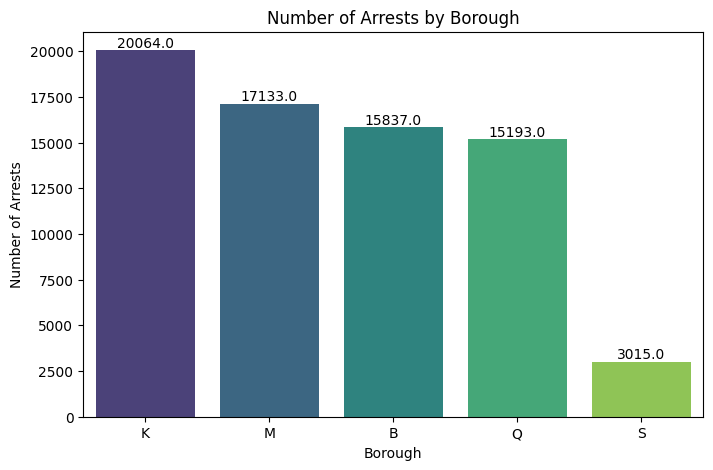

In [52]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=data, x='arrest_boro', order=data['arrest_boro'].value_counts().index, palette='viridis')
plt.title('Number of Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
for bar in ax.patches:
    ax.annotate(str(bar.get_height()), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                ha = 'center', va = 'bottom', fontsize = 10)
plt.show()

#### Number of arrests over the time

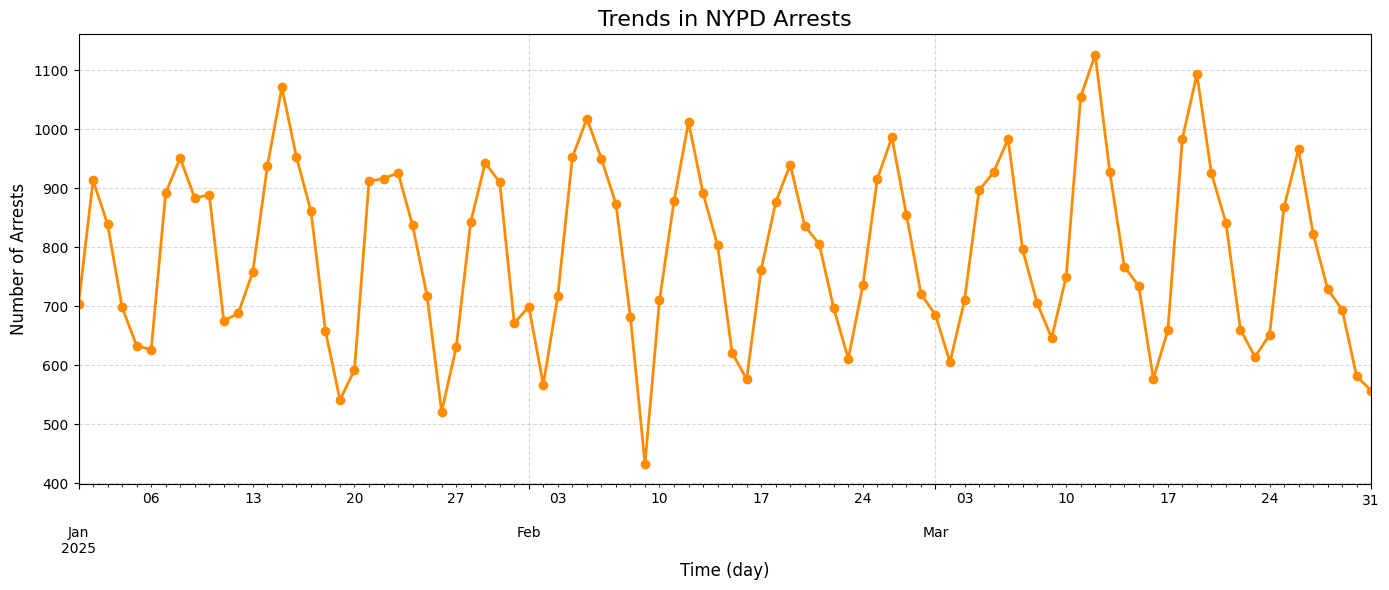

In [59]:
data['arrest_date'] = pd.to_datetime(data['arrest_date'])

# Group by Month-Year
monthly_trend = data.groupby(data['arrest_date'].dt.to_period('D')).size()

# Plot
plt.figure(figsize=(14,6))
monthly_trend.plot(marker='o', color='darkorange', linewidth=2)
plt.title('Trends in NYPD Arrests', fontsize=16)
plt.xlabel('Time (day)', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Distribution of Arrest by Gender and Race

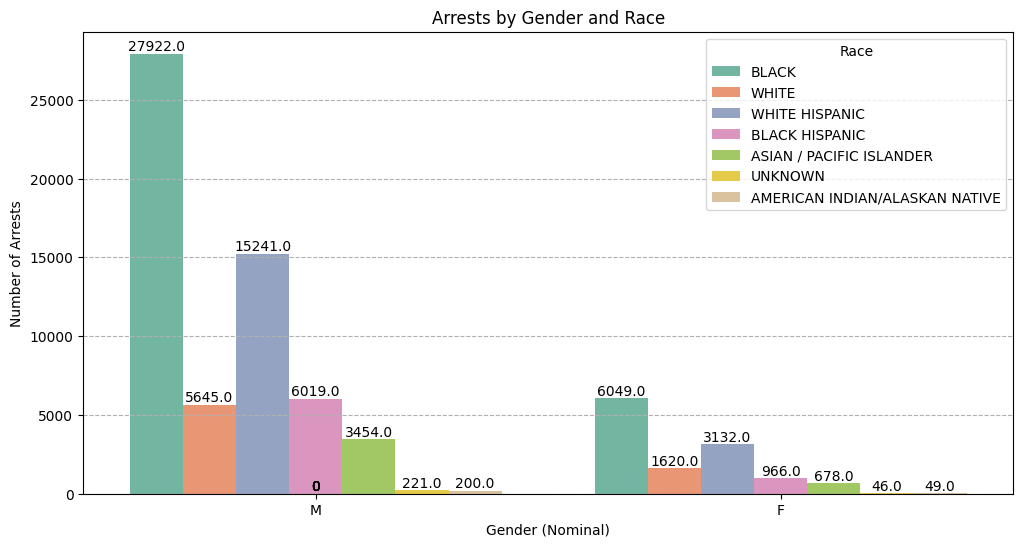

In [60]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='perp_sex', hue='perp_race', palette='Set2')
plt.title('Arrests by Gender and Race')
plt.xlabel('Gender (Nominal)')
plt.ylabel('Number of Arrests')
plt.legend(title='Race')
plt.grid(axis='y', linestyle='--')
for bar in ax.patches:
    ax.annotate(str(bar.get_height()), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                ha = 'center', va = 'bottom', fontsize = 10)
plt.show()

### Distribution of assrests by age group

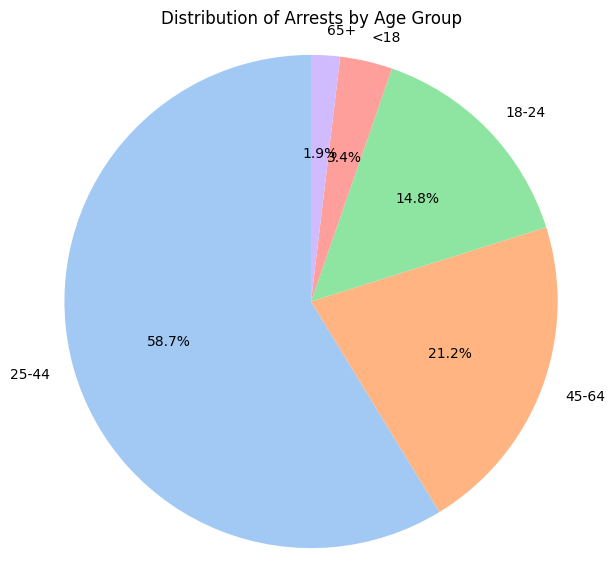

In [61]:
age_counts = data['age_group'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Arrests by Age Group')
plt.axis('equal')
plt.show()

### Distribution of arrests by Gender

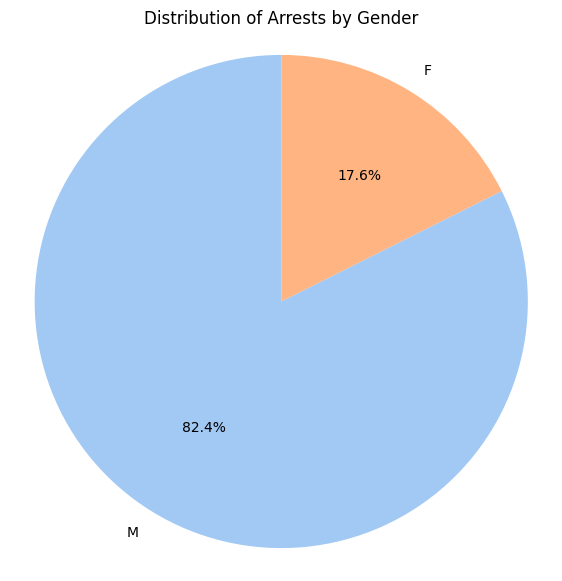

In [63]:
gender_count = data['perp_sex'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Arrests by Gender')
plt.axis('equal')
plt.show()

#### Top 5 Offenses

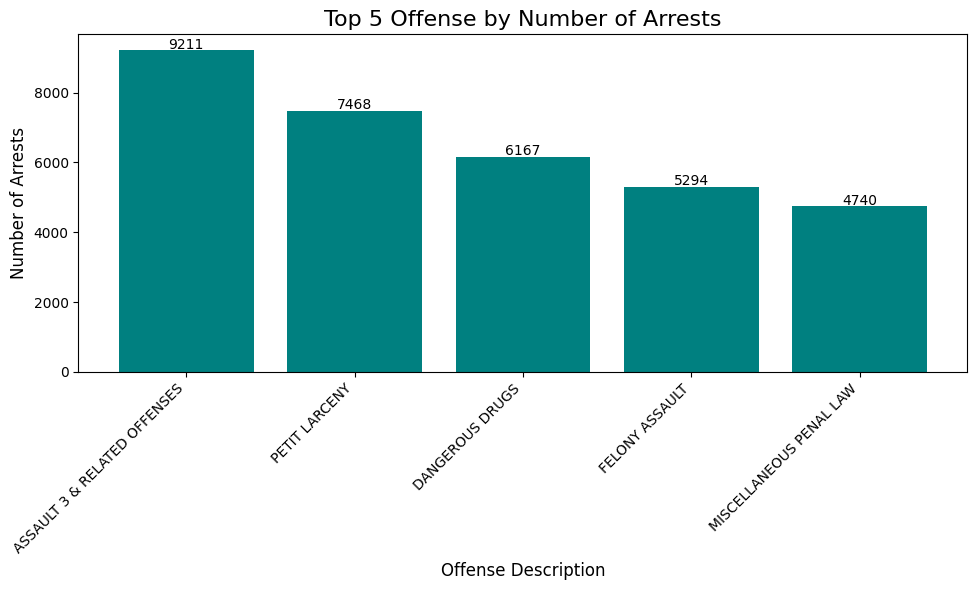

In [66]:
top5_offenses = data['ofns_desc'].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top5_offenses.index, top5_offenses.values, color='teal')

plt.title('Top 5 Offense by Number of Arrests', fontsize=16)
plt.xlabel('Offense Description', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()